In [1]:
import qiskit
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit version: 2.1.0
Runtime version: 0.40.1


## 3교시 : 양자 회로 시각화 및 결과 분석, 양자 상태의 시각화

### 3-1 양자 회로의 시각화

먼저 실습을 위한 예제 회로를 하나 만들어 봅시다. 이번에는 Qiskit이 제공하는 임의의 양자 회로를 만드는 함수를 사용합니다. 이 [API 문서](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_random)를 참고해 주세요.

In [2]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(4, 4, measure=True)

양자 회로는 다양한 방법으로 출력할 수 있습니다. 양자 회로를 그리는 방법에 대해서는 이 [가이드 문서](https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits)를 참고해주세요.

In [3]:
# text 형태로 출력합니다.
circ.draw('text')


┌────────────┐┌────┐┌────────┐      ┌─┐         
q_0: ┤ Rx(5.4838) ├┤ Sx ├┤2       ├──■───┤M├─────────
     └─┬───────┬──┘└─┬──┘│        │  │   └╥┘┌─┐      
q_1: ──┤1      ├─────■───┤3       ├──■────╫─┤M├──────
       │       │     │   │  Rcccx │┌─┴──┐ ║ └╥┘┌─┐   
q_2: ──┤0 Rccx ├─────■───┤0       ├┤ Sx ├─╫──╫─┤M├───
       │       │     │   │        │└─┬──┘ ║  ║ └╥┘┌─┐
q_3: ──┤2      ├─────■───┤1       ├──■────╫──╫──╫─┤M├
       └───────┘         └────────┘       ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

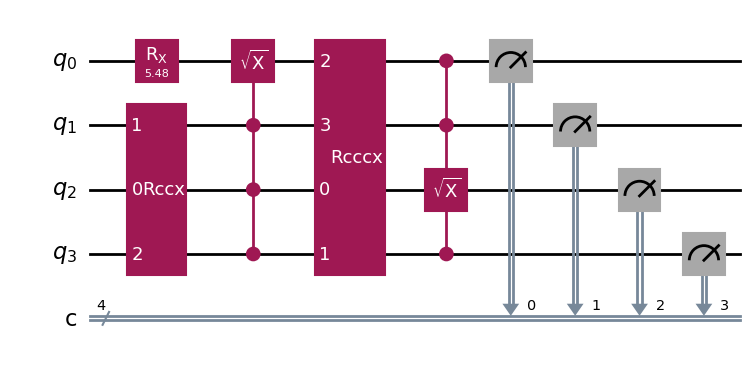

In [4]:
# matplotlib 형태로 출력합니다. 

circ.draw('mpl')

In [ ]:
# 컴파일 되지 않은 latex 형태로 출력합니다.
circ.draw(output="latex_source")


'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{R_X}\\,(\\mathrm{5.484})} & \\gate{\\mathrm{\\sqrt{X}}} & \\multigate{3}{\\mathrm{Rcccx}}_<<<{2} & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\multigate{2}{\\mathrm{Rccx}}_<<<{1} & \\ctrl{-1} & \\ghost{\\mathrm{Rcccx}}_<<<{3} & \\ctrl{1} & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\ghost{\\mathrm{Rccx}}_<<<{0} & \\ctrl{-1} & \\ghost{\\mathrm{Rcccx}}_<<<{0} & \\gate{\\mathrm{\\sqrt{X}}} & \\qw & \\qw & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{3} :  } & \\lstick{{q}_{3} :  } & \\ghost{\\mathrm{Rccx}}_<<<{2} & \\ctrl{-1} & \\ghost{\\mathrm{Rcccx}}_<<<{1} & \\ctrl{-1} & \\qw & \\qw & \\qw & \\meter & 

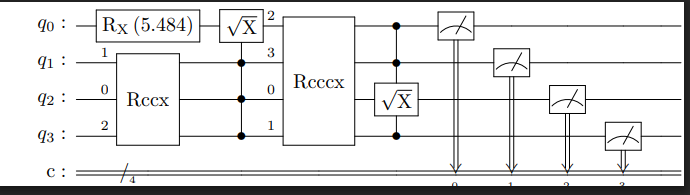

In [ ]:
from IPython.display import Image

Image("img/ex3_latex.png", width=900)

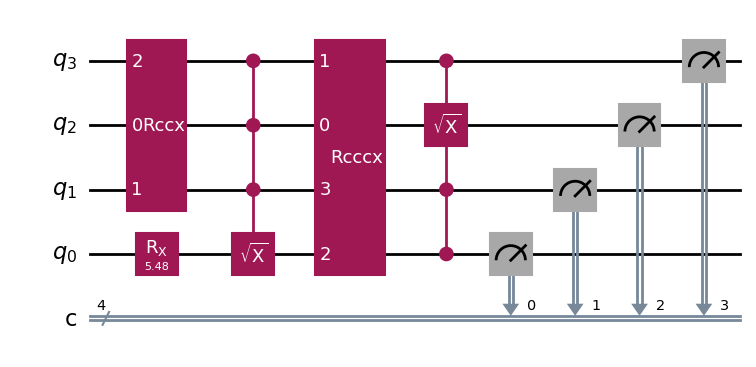

In [7]:
# 비트를 역순으로 그려봅니다.
circ.draw('mpl', reverse_bits=True)

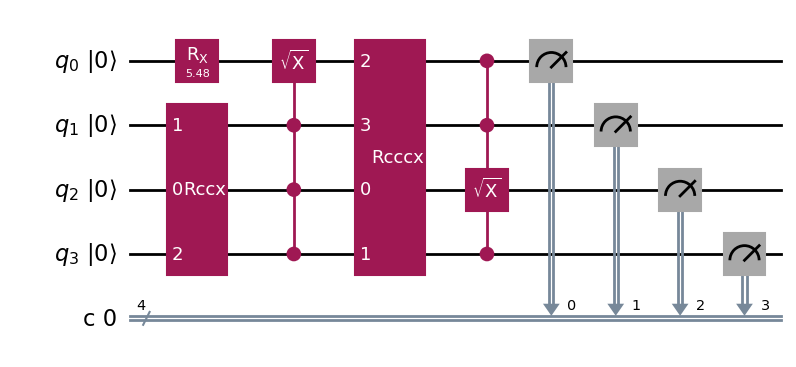

In [9]:
# 초기상태를 함께 그려줍니다.

circ.draw('mpl', initial_state=True)

### 3-2 양자 회로 실행 결과의 시각화


In [52]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram # plot_histogram을 불러옵니다.

backend = AerSimulator() # 시뮬레이터를 지정합니다.
sampler = Sampler(mode=backend) # Sampler 프리미티브로 회로를 실행합니다.

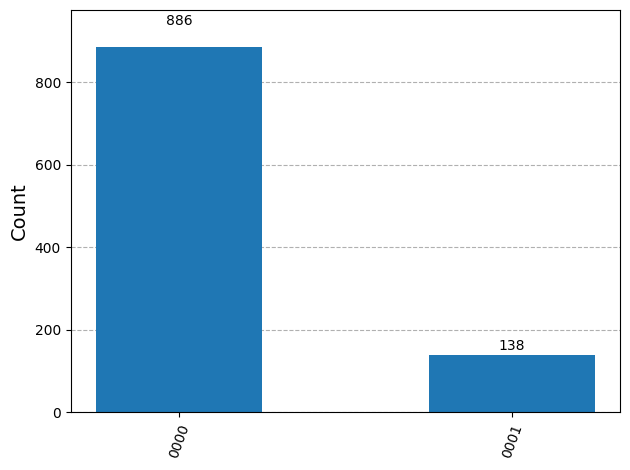

In [70]:
from qiskit import transpile
circ_sim = transpile(circ, backend=backend)

job = sampler.run([circ_sim]) # 회로를 실행합니다

# 회로의 실행 결과에서 count를 얻어 plot_histogram으로 그려봅니다.

result = job.result()

count = result[0].data.c.get_counts()

plot_histogram(count)

### 3-3 양자 상태의 시각화

양자 상태(statevector)를 시각화 하는 여러가지 방법을 살펴 봅니다. 이 [API 문서](https://quantum.cloud.ibm.com/docs/en/api/qiskit/visualization)를 참고합니다.

In [71]:
from qiskit.visualization import * #qiskit.visualization에 있는 모드 기능을 불러옵니다.
from qiskit.quantum_info import Statevector #Statevector을 불러옵니다

In [72]:
# 실습을 위해 새로운 랜덤 회로를 작성

circ = random_circuit(3, 4, measure=False)

In [73]:
# Statevector 클래스를 이용해 회로의 state vector를 계산하여 저장한다.

state = Statevector(circ)

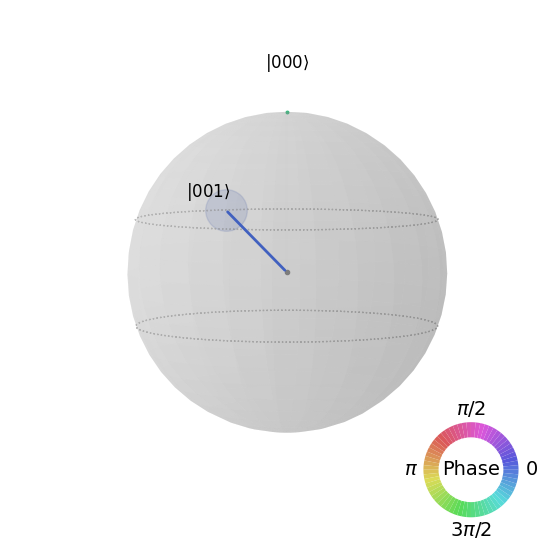

In [74]:
# 저장된 statevector를 plot_state_qsphere를 사용해 그려본다.

plot_state_qsphere(state)

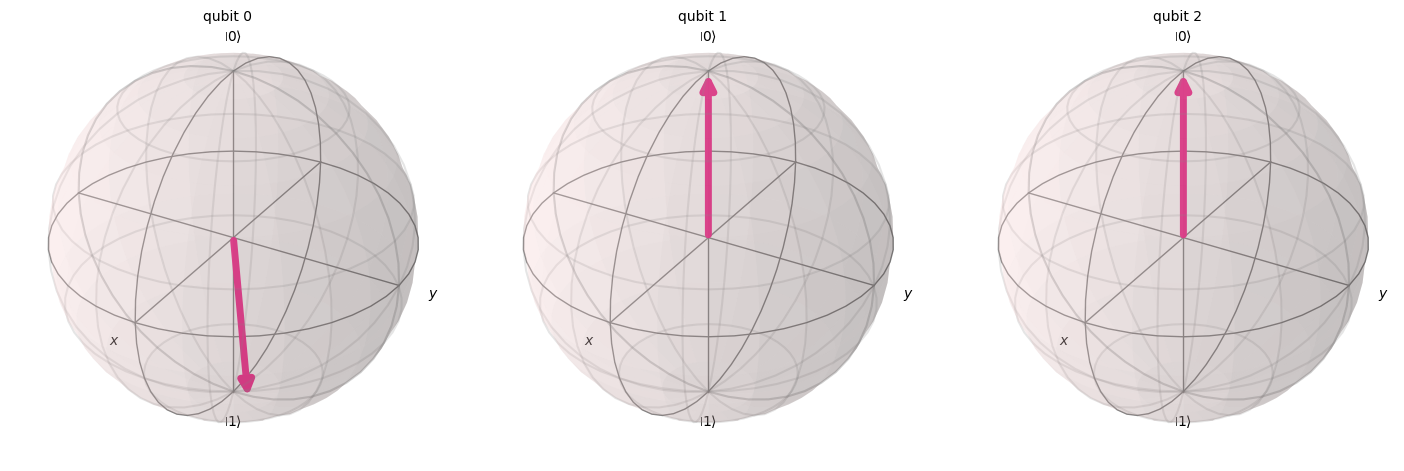

In [75]:
# 저장된 statevector를 plot_bloch_multivector를 사용해 그려본다.

plot_bloch_multivector(state)

### 중간 점검 퀴즈!

1. 다음중 실행되지 못하고 에러를 반환하는 코드는?

- A. `qc.draw('text')`
- B. `qc.draw('mpl')`
- C. `qc.draw('png')`
- D. `qc.draw('latex_source')`

In [ ]:
# 
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
# qc.draw('png')
## VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'

VisualizationError: 'Invalid output type png selected. The only valid choices are **text, latex, latex_source, and mpl**'

2. 주어진 bloch_vector를 만들어 낼 수 있는 양자 회로를 만들어 보세요.

![img](./img/ex9.png)


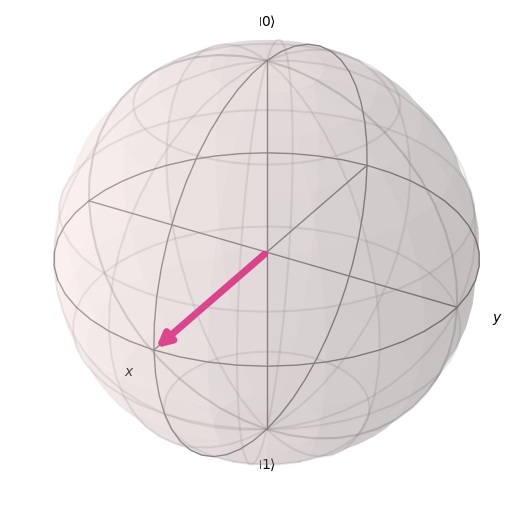

In [143]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt

# insert code here
qc = QuantumCircuit(3)
# qc.x(0)
# qc.h(0)


vector = Statevector.from_instruction(qc)

plot_bloch_vector(vector)

3. 큐비트가  $|0\rangle$의 상태에서 시작했을 때, 다음중 어느 코드가 큐빗의 상태가  $|0\rangle$에 남아있도록 하는가?

In [ ]:
#A
qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

#B
qc.ry(pi/2,0)
qc.rx(pi/2,0)
qc.s(0)

#C
qc.s(0)
qc.ry(pi/2,0)
qc.rx(pi/2,0)

#D
qc.rx(pi/2,0)
qc.s(0)
qc.ry(pi/2,0)

c:\WORKS\PNU\2025QiskitGlobalSummerSchool\miniconda3\envs\cwq\Lib\site-packages\numpy\ma\core.py:2896: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
c:\WORKS\PNU\2025QiskitGlobalSummerSchool\miniconda3\envs\cwq\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\WORKS\PNU\2025QiskitGlobalSummerSchool\miniconda3\envs\cwq\Lib\site-packages\matplotlib\transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


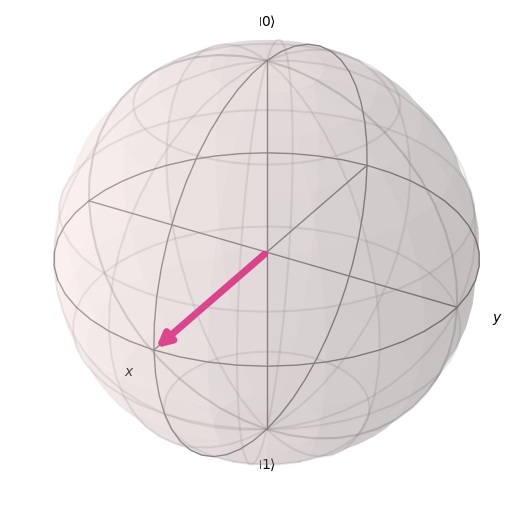

In [145]:
qc = QuantumCircuit(3)

state = Statevector.from_instruction(qc)

qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

plot_bloch_vector(state)

In [ ]:
# A